# Assignment 1 - Social Graphs and Interactions (02805) 
## October 2nd, 2018

The script should run in Python 3 and due to last minute issues the script didn't get to run all the way through. Please run the code. Thank you

### Part One: Network Models

### 1. Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when p = 1.
    * *As seen by the python code below the average shortest path length for the different graphs vary greatly. Graph 1 has 0 probability on being random, while with a 10% probability these 'short-cuts' are created that makes the average path length significally smaller.*
    * *When p=1 the graph is completely random. Every edge is rewired independently to a random node in the graph.*


The average shortest path length for graph with p=0.0 is 62.875751503006015
The average shortest path length for graph with p=0.1 is 7.329699398797596
The average shortest path length for graph with p=1.0 is 4.763174348697395


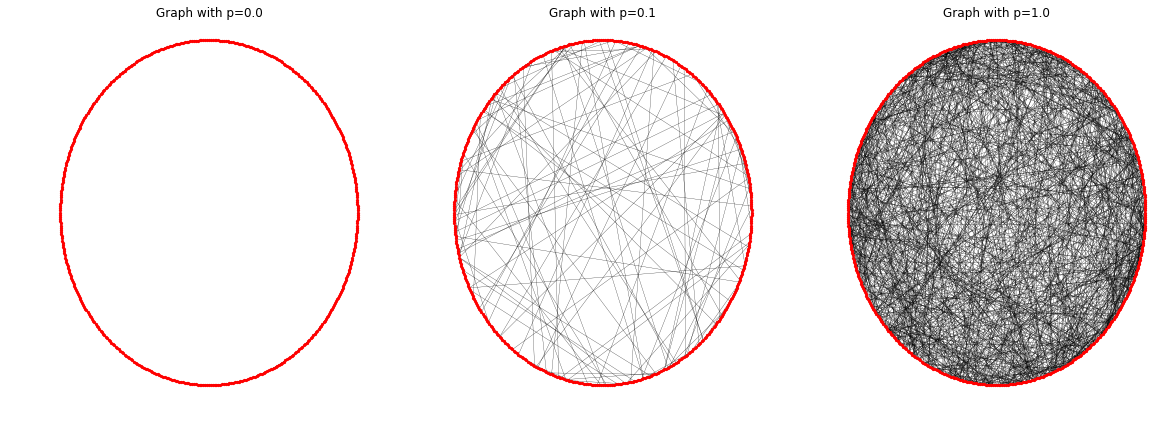

In [96]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

print("The average shortest path length for graph with p=0.0 is %s" % nx.average_shortest_path_length(G1))
print("The average shortest path length for graph with p=0.1 is %s" % nx.average_shortest_path_length(G2))
print("The average shortest path length for graph with p=1.0 is %s" % nx.average_shortest_path_length(G3))

fig, axs = plt.subplots(ncols=3, figsize=(20, 7))
nx.draw_shell(G1, node_size=5, width=0.25, ax=axs[0])
axs[0].set_title('Graph with p=0.0')
nx.draw_shell(G2, node_size=5, width=0.25, ax=axs[1])
axs[1].set_title('Graph with p=0.1')
nx.draw_shell(G3, node_size=5, width=0.25, ax=axs[2])
axs[2].set_title('Graph with p=1.0')
plt.show()

* Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.


In [97]:
p = [0,0.01,0.03,0.05,0.1,0.2]
d = [[],[],[],[],[],[]]

# Make 50x6 plots and calculate the average shortest path length of all networks
for i in range(0,6):
    for j in range(0,50):
        d[i].append(nx.average_shortest_path_length(nx.watts_strogatz_graph(500, 4, p[i])))
    print("Process at %s out of 6" % str(i+1))
        

Process at 1 out of 6
Process at 2 out of 6
Process at 3 out of 6
Process at 4 out of 6
Process at 5 out of 6
Process at 6 out of 6


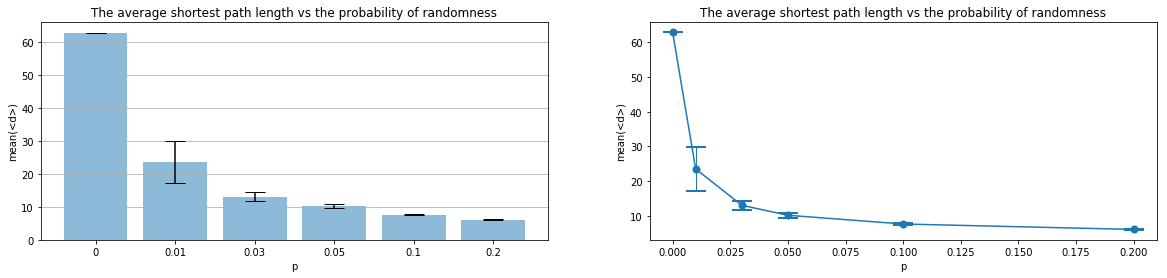

In [98]:
# Calculate mean + std for all p
d_mean = [0,0,0,0,0,0]
d_std = [0,0,0,0,0,0]

for i in range(0, len(d)):
    d_std[i] = np.std(d[i])
    d_mean[i] = np.mean(d[i])
    
    
fig, axs = plt.subplots(ncols=2, figsize=(20, 4))

# Plot 1 - Bar graph with errorbars
x_pos = np.arange(len(p))
# Build the plot
axs[0].bar(x_pos, d_mean, yerr=d_std, align='center', alpha=0.5, ecolor='black', capsize=10)
axs[0].set_ylabel('mean(<d>)')
axs[0].set_xlabel('p')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(p)
axs[0].set_title('The average shortest path length vs the probability of randomness')
axs[0].yaxis.grid(True)


# Plot 2 - Line graph with errorbars
plt.errorbar(p, d_mean, d_std, fmt='-o', capsize=10, elinewidth=1,markeredgewidth=2)
axs[1].set_ylabel('mean(<d>)')
axs[1].set_xlabel('p')
axs[1].set_title('The average shortest path length vs the probability of randomness')

# Show the figure
plt.show()

### 2. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.


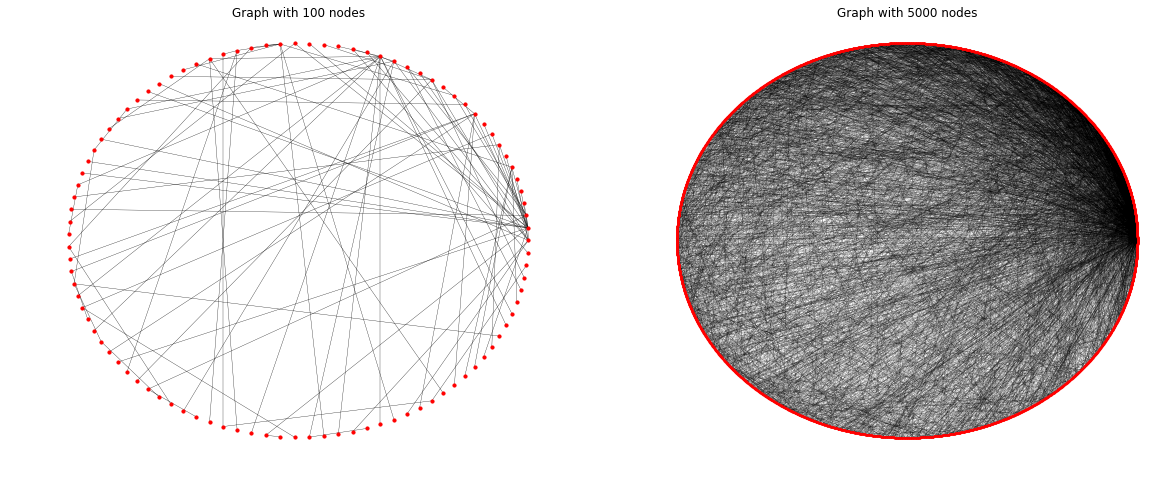

In [99]:
import random

# Function for BA network 
def create_BA_network(no_of_nodes):
  G = nx.Graph()
  G.add_edge(1, 2)
  
  # Connect a new node to a random node in G:
  for i in range(3, no_of_nodes):
    nodes = [n for tuple in G.edges() for n in tuple]
    rn = random.choice(nodes)
    G.add_edge(i,rn)
  return G

G100 = create_BA_network(100)
G5000 = create_BA_network(5000)

# plot resultning network
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
nx.draw_shell(G100, node_size=10, with_labels=False, width=0.3, ax=axs[0])
axs[0].set_title('Graph with 100 nodes')
nx.draw_shell(G5000, node_size=1, with_labels=False, width=0.1, ax=axs[1])
axs[1].set_title('Graph with 5000 nodes')
plt.show()

 * The 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.





min: 1 and max: 19 and average: 1.96
min: 1 and max: 101 and average: 1.9992


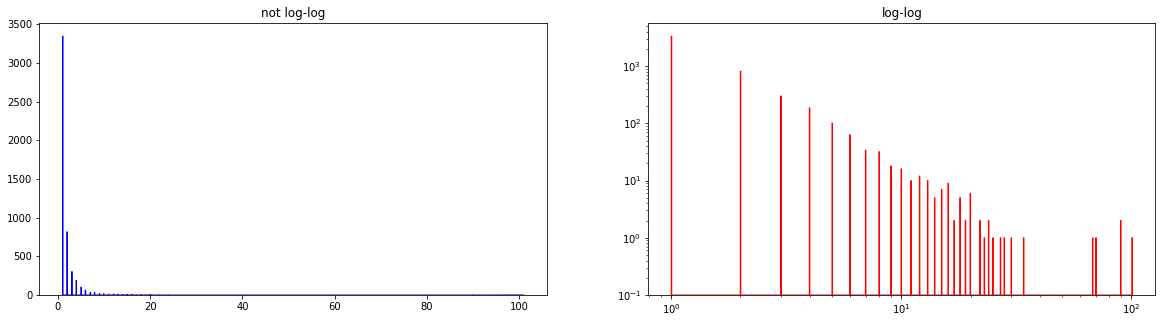

In [100]:
import pandas as pd

# Calculate and print minimum, maximum, and average degree of the BA graph
def print_degree_info(G, no_of_nodes):
  min = no_of_nodes
  max = 0
  average = 0
  for n in G.degree():
    average += n[1]
    if n[1] > max:
      max = n[1]
    elif n[1] < min:
      min = n[1]
  average = average/no_of_nodes 
  print("min: %s and max: %s and average: %s" % (min, max, average))
  return [min,max,average]
  
degree_info_g100 = print_degree_info(G100, 100)
degree_info_g5000 = print_degree_info(G5000, 5000)


# plot histogram
g5000 = []
[g5000.append(degree[1]) for degree in G5000.degree()]

fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

hist, bin_edges = np.histogram(g5000, bins = 'auto')
axs[0].hist(g5000, bins=bin_edges, histtype='step', linestyle='-', color='blue')
axs[0].set_title('not log-log')

# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bin_edges[0]),np.log10(bin_edges[-1]),len(bin_edges))
axs[1].hist(g5000, bins=logbins, histtype='step', linestyle='-', color='red', log=True)
axs[1].set_xscale("log")
axs[1].set_title("log-log")
plt.show()



## 3. Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that ''almost everyone'' have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).

In [101]:
# Pick a node i at random: 
nodes = list(G5000.nodes)
rndm_i = random.choice(nodes)
# Find its degree:
rndm_i_degree = G5000.degree(rndm_i)
print("The random node, %s, has the degree: %s" % (rndm_i, rndm_i_degree))

The random node, 442, has the degree: 1


* Find $i$'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.

In [102]:
# Find i's neighbors:
nb_i = list(G5000.neighbors(rndm_i))
print("i's neighbors are: %s" % nb_i)
# Calculate their average degree:
nb_i_degrees = [x[1] for x in G5000.degree(nb_i)]
nb_i_avg_degrees = np.mean(nb_i_degrees)
print("The average degree for i's neighbors is: %s" % nb_i_avg_degrees)

i's neighbors are: [55]
The average degree for i's neighbors is: 17.0


* Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.

In [103]:
# Compare the two numbers to check if it's true that i's friends (on average) have more friends than  i:
fs_paradox_bool = nb_i_avg_degrees > rndm_i_degree
print("It is %s that i's friends (on average) have more friends than i." % fs_paradox_bool)



It is True that i's friends (on average) have more friends than i.


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [104]:
# Do it 1000 times:
count = 0
for x in range(1001):
  rndm_i = random.choice(nodes)
  rndm_i_degree = G5000.degree(rndm_i)
  nb_i = list(G5000.neighbors(rndm_i))
  nb_i_degrees = [x[1] for x in G5000.degree(nb_i)]
  nb_i_avg_degrees = np.mean(nb_i_degrees)
  fs_paradox_bool = nb_i_avg_degrees > rndm_i_degree
# How many out of those 1000 times is the friendship paradox true?  
  if fs_paradox_bool:
    count += 1
    
print("The friendship paradox is true %s out of 1000 times." % count)

The friendship paradox is true 865 out of 1000 times.


### Part Two: The network of American politics

### 4. Basic stats for pages over time

Put together descriptive statistics for the US house of representatives over time (e.g. for the 113, 114 and 115th, congress).

* By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart.


congress_no
113    444
114    442
115    445
dtype: int64



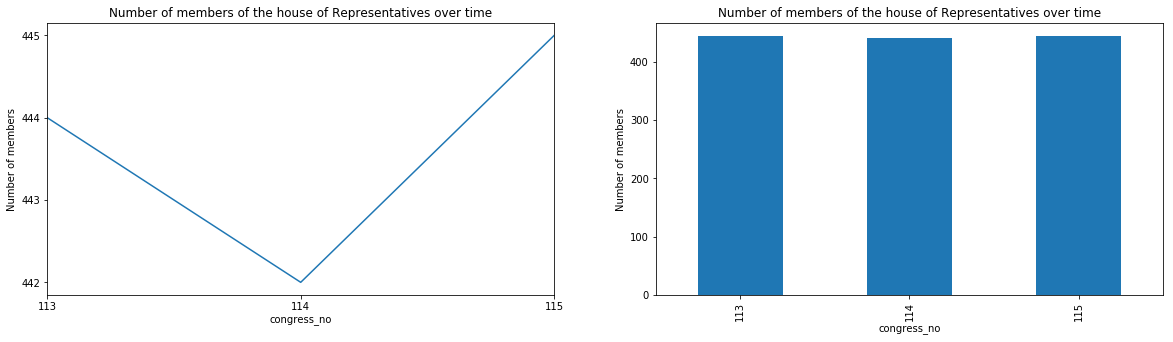

In [105]:
from matplotlib.ticker import MaxNLocator

df_113 = pd.read_csv('data_US_congress/H113.csv')
df_114 = pd.read_csv('data_US_congress/H114.csv')
df_115 = pd.read_csv('data_US_congress/H115.csv')

df_113['congress_no'] = 113
df_114['congress_no'] = 114
df_115['congress_no'] = 115

all_members= pd.concat([df_113, df_114, df_115]).reset_index(drop=True)

groups_name = all_members.groupby('WikiPageName')

individual_time_in_congress = groups_name.size().sort_values()
time_in_congress = individual_time_in_congress.groupby(individual_time_in_congress).size()


# Plot the number of members of the house of Representatives over time. 
# You chose if you want to use a line-chart or a bar-chart. 
# Is this development over time what you would expect? Why? Explain in your own words.
groups_congress_no = all_members.groupby('congress_no').size()
print(groups_congress_no, end='\n\n')

fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
groups_congress_no.plot('line', ax=axs[0])
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_ylabel("Number of members")
axs[0].set_title("Number of members of the house of Representatives over time")

groups_congress_no.plot('bar', ax=axs[1])
axs[1].set_ylabel("Number of members")
axs[1].set_title("Number of members of the house of Representatives over time")

plt.show()

Is this development over time what you would expect? Why?

The development in numbers of members in the house of Representatives is steady in the 113, 114 and 115th, congress as expected. There is usually 435 members of the house every term, but normally a handful of members resign and are replaced. The data from the three .csv-files contains both the resigned members and their replacements, therefore the number of members vary a bit.


* How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.


Number of members only in one congress: 131
Number of members in two congresses: 114
Number of members in all three congresses: 324


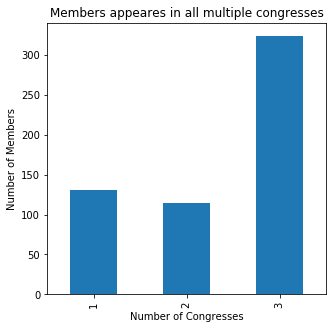

In [106]:
print("Number of members only in one congress: %s" % time_in_congress[1])
print("Number of members in two congresses: %s" % (time_in_congress[2]))
print("Number of members in all three congresses: %s" % time_in_congress[3])

# Plot your results using a histogram.
fig,ax = plt.subplots(figsize=(5, 5))
time_in_congress.plot('bar')
ax.set_title("Members appeares in all multiple congresses")
ax.set_ylabel("Number of Members")
ax.set_xlabel("Number of Congresses")
plt.show()

* Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.


Top 5 states with most represented: 
State
California      160
Texas           109
Florida          83
New York         82
Pennsylvania     56
dtype: int64


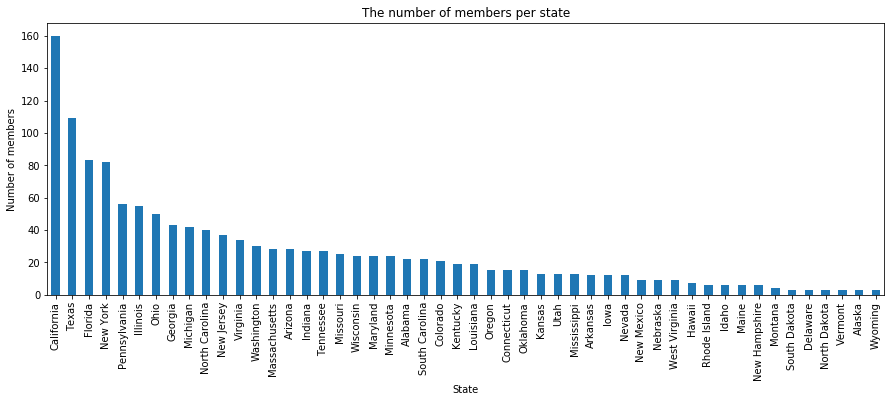

In [107]:
# Which states are more represented in the house of representatives? 
groups_state = all_members.groupby('State').size()
sorted_groups_state = groups_state.sort_values(ascending=False)
print("Top 5 states with most represented: \n%s" % sorted_groups_state.head(n=5))

# Which are less? Plot a histogram showing the number of members per state.
fig,ax = plt.subplots(figsize=(15, 5))
sorted_groups_state.plot('bar')
ax.set_title("The number of members per state")
ax.set_ylabel("Number of members")
plt.show()

* How has the party composition of the house of representative changed over time? Plot your results.

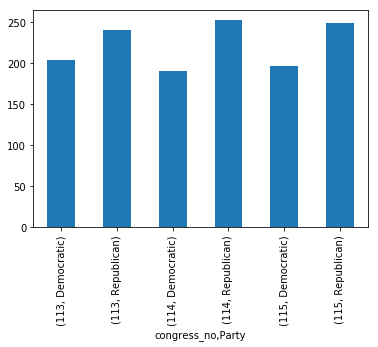

In [ ]:
groups_party = all_members.groupby(['congress_no', 'Party']).size()
groups_party.plot('bar')
plt.show()

### 5. Basic stats for the network
Create simple network statistics for the 113th house of representatives.

In [ ]:
from urllib.request import urlopen
import json
import re
from urllib.parse import quote

members = list(df_113.WikiPageName.unique())
states = list(df_113.State.unique())

groups_name_party = df_113.groupby(['WikiPageName', 'Party'])
Democratics = [member[0][0] for member in groups_name_party if member[0][1] == 'Democratic']
Republican = [member[0][0] for member in groups_name_party if member[0][1] == 'Republican'] 

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat= "format=json"

plt.figure(figsize=(20, 15))
G= nx.DiGraph()
G.add_nodes_from(members)

i = 0
for member1 in members:
    title = "titles="+quote(member1)
    query = "%s%s&%s&%s&%s" % (baseurl, action, title, content, dataformat)
    
    response = urlopen(query)
    wikisource = response.read()
    wikijson = json.loads(wikisource)
    i+=1
    #print("%s of 444, at %s " % (i,member1))

    for member2 in members:
        member = member2.replace("_", " ")
        member = member.split("(")[0]
        match = re.search(member, str(wikijson))
        if match:
            G.add_edge(member1,member2)

layout = nx.spring_layout(G,iterations=25)
nx.draw_networkx_nodes(G, layout, nodelist=Democratics, node_color='blue', node_size=10)
nx.draw_networkx_nodes(G, layout, nodelist=Republican, node_color='red', node_size=10)
nx.draw_networkx_edges(G, layout, width=0.5, edge_color="#cccccc")         
plt.show()

* What is the number of nodes in the network? And the number of links?

In [ ]:
plt.figure(figsize=(20, 15))
layout = nx.spring_layout(G,iterations=25)
nx.draw_networkx_nodes(G,layout, nodelist=Democratics, node_color='blue', node_size=10)
nx.draw_networkx_nodes(G,layout, nodelist=Republican, node_color='red', node_size=10)
nx.draw_networkx_edges(G,layout, width=0.5, edge_color="#cccccc") 
plt.axis('off')
plt.show()

print("The number of nodes in the network is %s" % (len(members)))
print("The number of edges/links in the network is %s" % (G.number_of_edges()))

* Plot the in and out-degree distributions.


In [ ]:
x = list(G.in_degree())
y = list(G.out_degree())
print("The minimum in degree is %s, while the maximum in degree is %s" % (min(x),max(x)))
print("The minimum out degree is %s, while the maximum out degree is %s" % (min(y), max(y)))

hist, bin_edges = np.histogram([degree[1] for degree in x], bins = 'auto')

plt.bar(bin_edges[:-1], hist, width = 1)
plt.show()

hist, bin_edges = np.histogram([degree[1] for degree in y], bins = 'auto')
plt.bar(bin_edges[:-1], hist, width = 1)
plt.show()


* Who is the most connected representative?

In [ ]:
print("The most connected representative is %s " % max(G.degree()))
print("The least connected representative is %s " %min(G.degree()))

In [ ]:
# Plotting, because why not. it looks cool!
plt.figure(figsize=(20, 15))
G = nx.from_pandas_edgelist(df_113, source="WikiPageName", target="State")#, create_using=nx.DiGraph())

layout = nx.spring_layout(G,iterations=25)
state_size = [G.degree(state) * 20 for state in states]
nx.draw_networkx_nodes(G, layout, nodelist=states, node_size=state_size, node_color='lightblue')
nx.draw_networkx_nodes(G, layout, nodelist=Democratics, node_color='blue', node_size=10)
nx.draw_networkx_nodes(G, layout, nodelist=Republican, node_color='red', node_size=10)
nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(states, states))
nx.draw_networkx_labels(G, layout, labels=node_labels)

plt.axis('off')
plt.title("Congress 113")
plt.show()